In [1]:
# Import the necessary libararies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import glob
import re
import os
%matplotlib inline

# Set the no of columns to be displayed to 500
pd.set_option('display.max_columns', 500)

# Set the no of rows to be displayed to 200
pd.set_option('display.max_rows', 200)

#set scientific noations 9.8e+11 to 9888777777.1245
pd.options.display.float_format = '{:.4f}'.format 

In [2]:
####################### Define Global Variables ##################################

# Assign the path of the local dir to a variable. 
#This path must be updated, if the notebook is being executed on a different machine.

Local_Dir = r"C:\DS_Learning\Data_Science_IITB\EDA\EDA Case Study\Dataset"


# Store the name of the file in a variable. The file contanins the information about the loan application at the time of applying for the loan.
# The variable must be updated, if a different version of file being used

Loan_App_Data_File = r"\application_data.csv"
Loan_App_Dataset = str(Local_Dir + Loan_App_Data_File)


#Load the file and create the dataframe
df = pd.read_csv(Loan_App_Dataset, index_col = None) 


In [3]:
# Get the basic information about the Dataset
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,-9461,-637,-3648.0000,-2120,nan,1,1,0,1,1,0,Laborers,1.0000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0830,0.2629,0.1394,0.0247,0.0369,0.9722,0.6192,0.0143,0.0000,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.0000,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0000,2.0000,2.0000,2.0000,-1134.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0000,-291,nan,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3113,0.6222,nan,0.0959,0.0529,0.9851,0.7960,0.0605,0.0800,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.0800,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0000,0.0000,1.0000,0.0000,-828.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,-19046,-225,-4260.0000,-2531,26.0000,1,1,1,1,1,0,Laborers,1.0000,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.5559,0.

In [4]:
# Get the no of rows and columns
print('\t Application Dataset has {} rows and {} columns ..'.format(df.shape[0],df.shape[1]))

	 Application Dataset has 307511 rows and 122 columns ..


In [5]:
# Print the datatype of each column of the dataframe
print(df.info())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION          

In [6]:
# Get the no of missing values in each column
Null_Pcent = round((df.isnull().sum(axis = 0)/len(df.index)*100),2)
print(Null_Pcent)

SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0000
AMT_GOODS_PRICE                 0.0900
NAME_TYPE_SUITE                 0.4200
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
OWN_CAR_AGE                    65.9900
FLAG_MOBIL                      0.0000
FLAG_EMP_PHONE                  0.0000
FLAG_WORK_PHONE                 0.0000
FLAG_CONT_MOBILE         

In [7]:
#Get the columns, that have more than 30% of missing values
Null_Pcent = Null_Pcent.loc[Null_Pcent.values > 30]
Null_Pcent.sort_values(ascending = False)

COMMONAREA_AVG                 69.8700
COMMONAREA_MODE                69.8700
COMMONAREA_MEDI                69.8700
NONLIVINGAPARTMENTS_MODE       69.4300
NONLIVINGAPARTMENTS_MEDI       69.4300
NONLIVINGAPARTMENTS_AVG        69.4300
FONDKAPREMONT_MODE             68.3900
LIVINGAPARTMENTS_MODE          68.3500
LIVINGAPARTMENTS_AVG           68.3500
LIVINGAPARTMENTS_MEDI          68.3500
FLOORSMIN_AVG                  67.8500
FLOORSMIN_MEDI                 67.8500
FLOORSMIN_MODE                 67.8500
YEARS_BUILD_AVG                66.5000
YEARS_BUILD_MODE               66.5000
YEARS_BUILD_MEDI               66.5000
OWN_CAR_AGE                    65.9900
LANDAREA_MODE                  59.3800
LANDAREA_AVG                   59.3800
LANDAREA_MEDI                  59.3800
BASEMENTAREA_MEDI              58.5200
BASEMENTAREA_AVG               58.5200
BASEMENTAREA_MODE              58.5200
EXT_SOURCE_1                   56.3800
NONLIVINGAREA_MODE             55.1800
NONLIVINGAREA_MEDI       

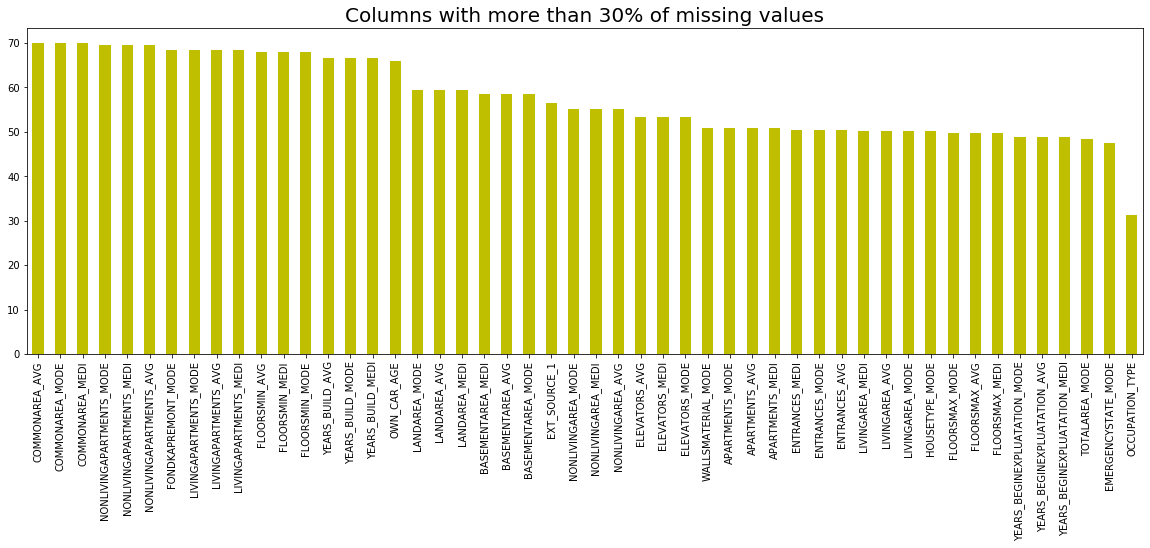

In [8]:
plt.figure(figsize=(20,6))
Null_Pcent.sort_values(ascending = False).plot(kind = 'bar', color = 'y')
plt.title('Columns with more than 30% of missing values', fontsize = 20)
plt.show()

# Observations

As we can see from the above graph:
- There are 50 columns, that have more than 30% of missing values.
- Some columns have **extrement large values** such as COMMONAREA_AVG, COMMONAREA_MODE, COMMONAREA_MEDI,
   FLOORSMIN_AVG, FLOORSMIN_MEDI etc.
- With more than 30% of missing values, these columns are not recommended to use for any anaylsis,
  without proper treatment/imputation. Since, the no of columns to be treated are high, hence, imputing
  these columns with arbitrary values like mean, median, mode etc, would be risky and might produce
  unexpected results. It is better to drop all these columns, but, for this exercise, we only need to drop columns
  that are having more than 65% of missing values.




In [9]:
# Drop the columns, that have more than 65% of missing values
Null_Pcent_1 = Null_Pcent.loc[Null_Pcent.values > 65]
df.drop(Null_Pcent_1.index, axis = 1, inplace = True)

In [10]:
# Verify, the null values percentage
print(round((df.isnull().sum(axis = 0)/len(df.index)*100),2).sort_values(ascending = False))

LANDAREA_MEDI                  59.3800
LANDAREA_AVG                   59.3800
LANDAREA_MODE                  59.3800
BASEMENTAREA_MODE              58.5200
BASEMENTAREA_AVG               58.5200
BASEMENTAREA_MEDI              58.5200
EXT_SOURCE_1                   56.3800
NONLIVINGAREA_MODE             55.1800
NONLIVINGAREA_AVG              55.1800
NONLIVINGAREA_MEDI             55.1800
ELEVATORS_MODE                 53.3000
ELEVATORS_MEDI                 53.3000
ELEVATORS_AVG                  53.3000
WALLSMATERIAL_MODE             50.8400
APARTMENTS_MEDI                50.7500
APARTMENTS_MODE                50.7500
APARTMENTS_AVG                 50.7500
ENTRANCES_MEDI                 50.3500
ENTRANCES_MODE                 50.3500
ENTRANCES_AVG                  50.3500
LIVINGAREA_AVG                 50.1900
LIVINGAREA_MODE                50.1900
LIVINGAREA_MEDI                50.1900
HOUSETYPE_MODE                 50.1800
FLOORSMAX_MODE                 49.7600
FLOORSMAX_AVG            

***There are few columns, that are having approximately 13% missing values, these are good candidate for imputation***

***Let's check what values these columns have.***

In [11]:
Null_Col_list_1 = round((df.isnull().sum(axis = 0)/len(df.index)*100),2)

In [12]:
# Get the unique values and count of 0

l_col_list_2 = []
for col in Null_Col_list_1.index:
    if Null_Col_list_1.loc[col] > 13 and Null_Col_list_1.loc[col] <= 15:
        l_col_list_2.append(col)
        print("\n")
        print(col)
        print("Unique Values => ", df[col].unique())
        print("% of '0' as a value => {}".format(round(df[col].apply(lambda x: int(x + 1) if x == 0 else 0).sum()/len(df.index)*100),2))



AMT_REQ_CREDIT_BUREAU_HOUR
Unique Values =>  [ 0. nan  1.  2.  3.  4.]
% of '0' as a value => 86.0


AMT_REQ_CREDIT_BUREAU_DAY
Unique Values =>  [ 0. nan  1.  3.  2.  4.  5.  6.  9.  8.]
% of '0' as a value => 86.0


AMT_REQ_CREDIT_BUREAU_WEEK
Unique Values =>  [ 0. nan  1.  3.  2.  4.  5.  6.  8.  7.]
% of '0' as a value => 84.0


AMT_REQ_CREDIT_BUREAU_MON
Unique Values =>  [ 0. nan  1.  2.  6.  5.  3.  7.  9.  4. 11.  8. 16. 12. 14. 10. 13. 17.
 24. 19. 15. 23. 18. 27. 22.]
% of '0' as a value => 72.0


AMT_REQ_CREDIT_BUREAU_QRT
Unique Values =>  [  0.  nan   1.   2.   4.   3.   8.   5.   6.   7. 261.  19.]
% of '0' as a value => 70.0


AMT_REQ_CREDIT_BUREAU_YEAR
Unique Values =>  [ 1.  0. nan  2.  4.  5.  3.  8.  6.  9.  7. 10. 11. 13. 16. 12. 25. 23.
 15. 14. 22. 17. 19. 18. 21. 20.]
% of '0' as a value => 23.0


***As we can see, all these columns are float and they are representing basically date/time, and already have zeroes(0) in high percentage. Therefore, it is safe to impute these columns by "0"***

In [13]:
# Impute columns with "0"
for col in l_col_list_2:
    df[col].fillna('0', inplace = True)

In [14]:
#Re-verify, the missing values percentage
print(round((df.isnull().sum(axis = 0)/len(df.index)*100),2).sort_values(ascending = False))

LANDAREA_AVG                   59.3800
LANDAREA_MODE                  59.3800
LANDAREA_MEDI                  59.3800
BASEMENTAREA_AVG               58.5200
BASEMENTAREA_MODE              58.5200
BASEMENTAREA_MEDI              58.5200
EXT_SOURCE_1                   56.3800
NONLIVINGAREA_MEDI             55.1800
NONLIVINGAREA_AVG              55.1800
NONLIVINGAREA_MODE             55.1800
ELEVATORS_AVG                  53.3000
ELEVATORS_MODE                 53.3000
ELEVATORS_MEDI                 53.3000
WALLSMATERIAL_MODE             50.8400
APARTMENTS_AVG                 50.7500
APARTMENTS_MEDI                50.7500
APARTMENTS_MODE                50.7500
ENTRANCES_MEDI                 50.3500
ENTRANCES_MODE                 50.3500
ENTRANCES_AVG                  50.3500
LIVINGAREA_MODE                50.1900
LIVINGAREA_MEDI                50.1900
LIVINGAREA_AVG                 50.1900
HOUSETYPE_MODE                 50.1800
FLOORSMAX_AVG                  49.7600
FLOORSMAX_MODE           

***Check, if any of the Object Datatype columns can be treated***

In [15]:
print(round(df.select_dtypes(include = 'object').isnull().sum(axis = 0)/len(df.index)*100,2).sort_values(ascending = False))

WALLSMATERIAL_MODE           50.8400
HOUSETYPE_MODE               50.1800
EMERGENCYSTATE_MODE          47.4000
OCCUPATION_TYPE              31.3500
NAME_TYPE_SUITE               0.4200
AMT_REQ_CREDIT_BUREAU_YEAR    0.0000
NAME_FAMILY_STATUS            0.0000
CODE_GENDER                   0.0000
FLAG_OWN_CAR                  0.0000
FLAG_OWN_REALTY               0.0000
NAME_INCOME_TYPE              0.0000
NAME_EDUCATION_TYPE           0.0000
WEEKDAY_APPR_PROCESS_START    0.0000
NAME_HOUSING_TYPE             0.0000
AMT_REQ_CREDIT_BUREAU_QRT     0.0000
ORGANIZATION_TYPE             0.0000
AMT_REQ_CREDIT_BUREAU_HOUR    0.0000
AMT_REQ_CREDIT_BUREAU_DAY     0.0000
AMT_REQ_CREDIT_BUREAU_WEEK    0.0000
AMT_REQ_CREDIT_BUREAU_MON     0.0000
NAME_CONTRACT_TYPE            0.0000
dtype: float64


***Column OCCUPATION_TYPE can be treated, let's check what are the unique values in the column***

In [16]:
df.groupby('OCCUPATION_TYPE')['SK_ID_CURR'].nunique()

OCCUPATION_TYPE
Accountants               9813
Cleaning staff            4653
Cooking staff             5946
Core staff               27570
Drivers                  18603
HR staff                   563
High skill tech staff    11380
IT staff                   526
Laborers                 55186
Low-skill Laborers        2093
Managers                 21371
Medicine staff            8537
Private service staff     2652
Realty agents              751
Sales staff              32102
Secretaries               1305
Security staff            6721
Waiters/barmen staff      1348
Name: SK_ID_CURR, dtype: int64

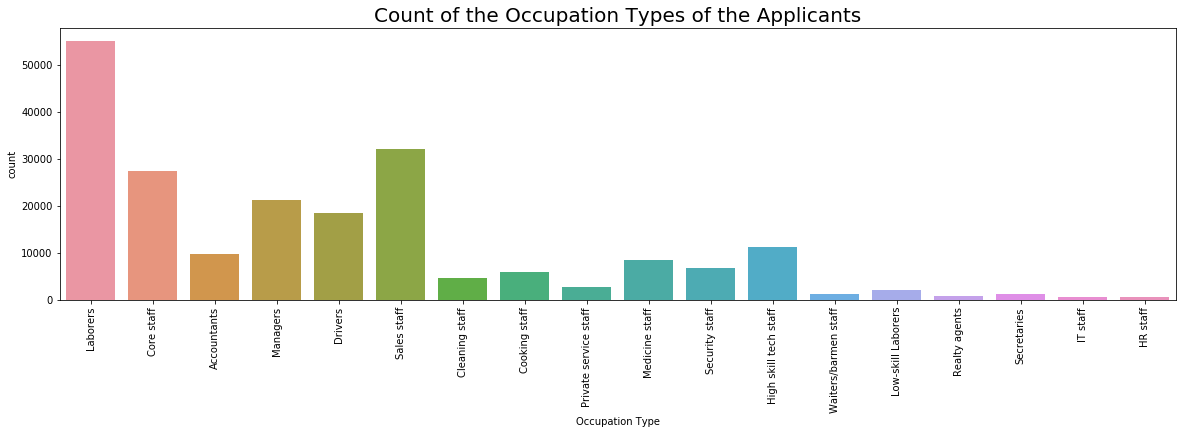

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'OCCUPATION_TYPE', data = df)
plt.xlabel('Occupation Type')
plt.xticks(rotation = '90')
plt.title('Count of the Occupation Types of the Applicants', fontsize = 20)
plt.show()

# Observations
 It seems that the "Self Employed" is missing in the Occupation List, which is the major chunk of occupation, hence, we can impute the missing values in the variable with the value "Self Employed"

### Columns, that have only 1 unique value are not useful in the analysis and hence, can be removed ###

In [18]:
# Get the count of the values in the left out columns
l_unique = df.nunique()

In [19]:
# Get only those columns, that have only 1 unique value
l_unique = l_unique[l_unique.values == 1]

In [20]:
# Drop such columns
df.drop(labels = list(l_unique.index), inplace = True)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 105 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(43), int64(41), object(21)
memory usage: 248.7+ MB


In [22]:
# Get the rows, which do not have any column populated or all the columns have null values
print(df.isnull().all(axis = 1).sum())


0


### There is no row, where all the columns are null. Hence, no need to delete any rows






 

### Keep the Relevant Columns ###

Based on the information available in the Data Dictionary, the following columns should be sufficient to analyze the Application dataset.


In [23]:
#Hence, except these, removing all the columns from the dataframe
Rel_Col_List = ['SK_ID_CURR'
, 'TARGET' 
, 'NAME_CONTRACT_TYPE' 
, 'CODE_GENDER'
, 'FLAG_OWN_CAR' 
, 'FLAG_OWN_REALTY' 
, 'CNT_CHILDREN' 
, 'AMT_INCOME_TOTAL' 
, 'AMT_CREDIT'
, 'AMT_ANNUITY'
, 'AMT_GOODS_PRICE'
, 'NAME_INCOME_TYPE'
, 'NAME_EDUCATION_TYPE'
, 'NAME_FAMILY_STATUS'
, 'NAME_HOUSING_TYPE'
, 'DAYS_BIRTH'
, 'DAYS_EMPLOYED'
, 'OCCUPATION_TYPE'
, 'CNT_FAM_MEMBERS'
, 'ORGANIZATION_TYPE'
, 'HOUSETYPE_MODE'
, 'AMT_REQ_CREDIT_BUREAU_QRT']
df = df.loc[:, Rel_Col_List].copy()

In [24]:
# Verify the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 22 columns):
SK_ID_CURR                   307511 non-null int64
TARGET                       307511 non-null int64
NAME_CONTRACT_TYPE           307511 non-null object
CODE_GENDER                  307511 non-null object
FLAG_OWN_CAR                 307511 non-null object
FLAG_OWN_REALTY              307511 non-null object
CNT_CHILDREN                 307511 non-null int64
AMT_INCOME_TOTAL             307511 non-null float64
AMT_CREDIT                   307511 non-null float64
AMT_ANNUITY                  307499 non-null float64
AMT_GOODS_PRICE              307233 non-null float64
NAME_INCOME_TYPE             307511 non-null object
NAME_EDUCATION_TYPE          307511 non-null object
NAME_FAMILY_STATUS           307511 non-null object
NAME_HOUSING_TYPE            307511 non-null object
DAYS_BIRTH                   307511 non-null int64
DAYS_EMPLOYED                307511 non-null int64
OCCUPA

In [25]:
# Get the high level veiw of the updated dataframe
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,HOUSETYPE_MODE,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,Laborers,1.0000,Business Entity Type 3,block of flats,0.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,State servant,Higher education,Married,House / apartment,-16765,-1188,Core staff,2.0000,School,block of flats,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,Laborers,1.0000,Government,NaN,0.0000
3,100006,0,Cash loans,F,N,Y,0,135000.0000,312682.5000,29686.5000,297000.0000,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,Laborers,2.0000,Business Entity Type 3,NaN,0
4,100007,0,Cash loans,M,N,Y,0,121500.0000,513000.0000,21865.5000,513000.0000,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,Core staff,1.0000,Religion,NaN,0.0000


***Column CNT_FAM_MEMBERS is defined as float, but, it should be integer, as count of family bembers cannot be in decimal values, hence, changing its datatype to Integer.***

In [26]:
# First, impute the Missing Values with '0' 
df['CNT_FAM_MEMBERS'].fillna('0', inplace = True)

# Convert the column to Int
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype('int')

***Columns DAYS_BIRTH and DAYS_EMPLOYED have negative(-ve) values, which is not possible. Hence, they need to be cleansed***

In [27]:
#Remove the -ve sign from the columns
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: str(x).replace('-','')).astype('int')

df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: str(x).replace('-','')).astype('int')

***Create new columns AGE and JOB_EXPERIENCE***


In [28]:
df['AGE'] = df['DAYS_BIRTH'].apply(lambda x: x//365)

df['JOB_EXPERIENCE'] = df['DAYS_EMPLOYED'].apply(lambda x: round(x/365,1)).astype('float')

In [29]:
# Verify the new columns
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,HOUSETYPE_MODE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,JOB_EXPERIENCE
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,Laborers,1,Business Entity Type 3,block of flats,0.0000,25,1.7000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,State servant,Higher education,Married,House / apartment,16765,1188,Core staff,2,School,block of flats,0.0000,45,3.3000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,Laborers,1,Government,NaN,0.0000,52,0.6000
3,100006,0,Cash loans,F,N,Y,0,135000.0000,312682.5000,29686.5000,297000.0000,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,Laborers,2,Business Entity Type 3,NaN,0,52,8.3000
4,100007,0,Cash loans,M,N,Y,0,121500.0000,513000.0000,21865.5000,513000.0000,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,Core staff,1,Religion,NaN,0.0000,54,8.3000


### Check for outliers in the interested columns

In [30]:
l_Int_Col_List = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AGE', 'JOB_EXPERIENCE', 'AMT_GOODS_PRICE']

In [31]:
def Check_Outliers():
    l_row = len(l_Int_Col_List)
    l_col = 3
    l_pos = 1
    fig = plt.figure(figsize=(20,30))
    for col in l_Int_Col_List:
        fig.add_subplot(l_row, l_col,l_pos)
        plt.title(col, fontsize = 20)
        sns.boxplot(data = df, y = col)
        #plt.yscale('log')
        l_pos = l_pos + 1
    plt.show()

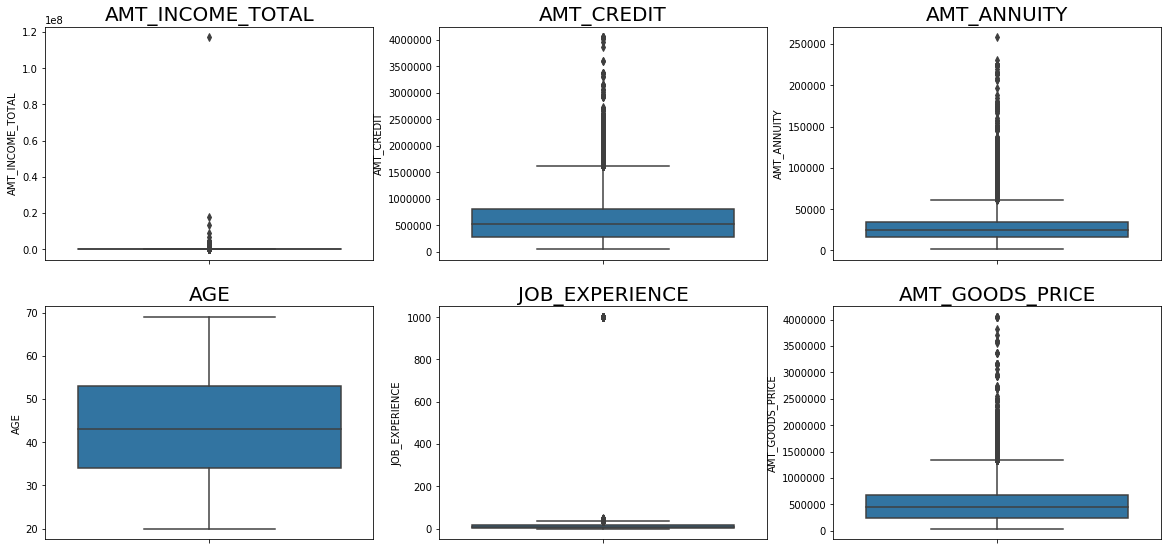

In [32]:
Check_Outliers()

### Observations

- There are outliers present in the following columns:
    - AMT_INCOME_TOTAL
    - AMT_ANNUITY
    - JOB_EXERIENCE
    - AMT_GOODS_PRICE
- Due to the presence of the outliers, the boxplot is not properly readable for the above columns
- AGE Column is formly distributed.
- Outliers Can be removed using IQR


In [33]:
# Remove outliers from the relevant columns using IRQ mechanism
l_col_list_3 = ['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'JOB_EXPERIENCE', 'AMT_GOODS_PRICE']
for col in l_col_list_3:
    q1, q3 = np.nanpercentile(df[col],[25, 75])
    iqr = q3 - q1
    l_bound = q1 - (1.5 * iqr)
    u_bound = q3 + (1.5 * iqr)
        #print(l_bound, u_bound)
    df = df[(df[col] > l_bound) & (df[col] < u_bound)]

### Verify the data after removing the outliers, perform analysis and provide insights

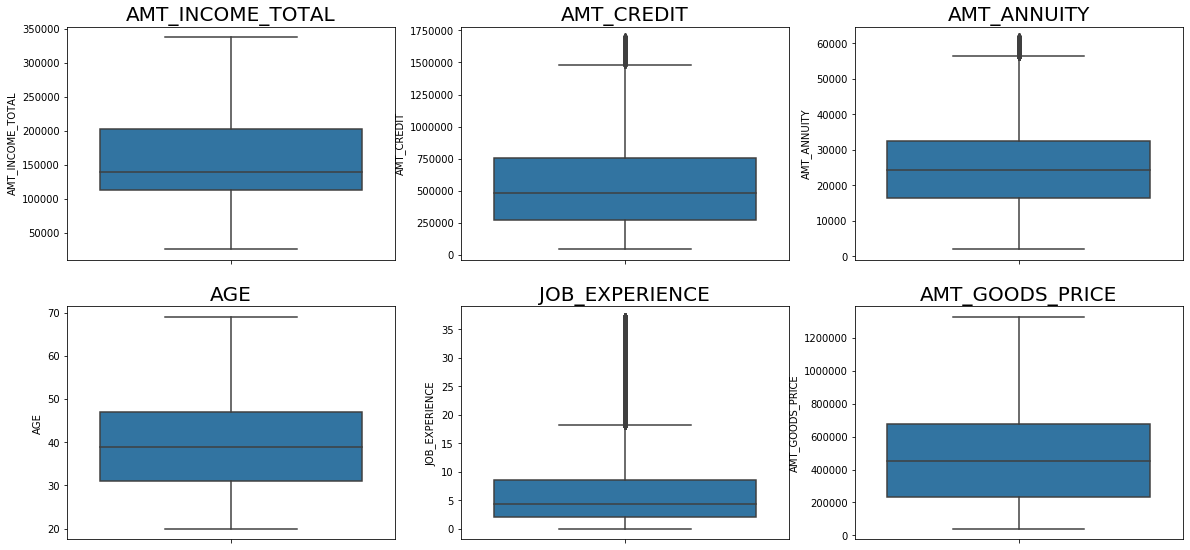

In [34]:
# Re-verify the data
Check_Outliers()

### Observations

- Outliers(values beyond upper bound i.e. 1.5 * 75 Percentile) have been removed from the dataset for the above mentioned numeric columns
- The no of records have been reduced to 224797
- Most of the people applied for the loans are between 35 and 48 years old. As young as 20 years and as old as 69 years.
- Regarding work experience, majority of the applicants are having approximately 8 years of experience. While the average work experience is 4.4 years.
- The average income of the applicants is approximately 112500 . 75% of the applicants earn 202500.
- Average Loan Amount disbursed is 486000. Minimum and Maximum Loan Amount are 45000 and 1695483 respectively.



### Bin Continuous Variables

AMT_CREDIT and AMT_INCOME_TOTAL can be binned

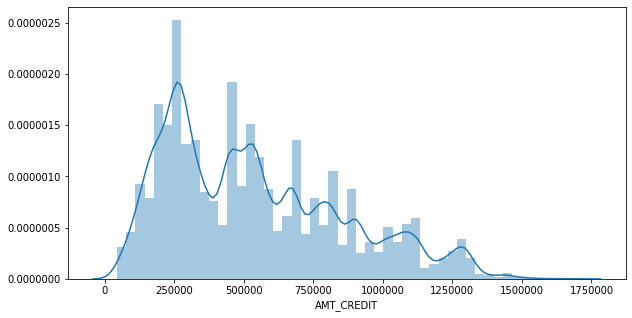

In [35]:
#Let's first plot the variable AMT_CREDIT
plt.figure(figsize = (10,5))
sns.distplot(df['AMT_CREDIT'])
plt.show()

Now, bin the variable into the following 4 discrete categories. This will help us in analyzing - Loan Amount varies across other variables such as Target(Default Rate), Income of the applicant etc
- Low
- Medium
- High
- Very High

In [36]:
# Define a local function, which will be used to bin the Credit/Loan Amount
def bin_credit_amount(l_amount):
    if l_amount < 250000:
        return 'Low'
    elif l_amount > 250000 and l_amount < 750000:
        return 'Medium'
    elif l_amount > 750000 and l_amount < 1250000:
        return 'High'
    else:
        return 'Very High'

In [37]:
df['AMT_CREDIT'] = df['AMT_CREDIT'].apply(lambda x : bin_credit_amount(x))

In [38]:
df['AMT_CREDIT'].value_counts()

Medium       121223
High          50959
Low           45036
Very High      7579
Name: AMT_CREDIT, dtype: int64

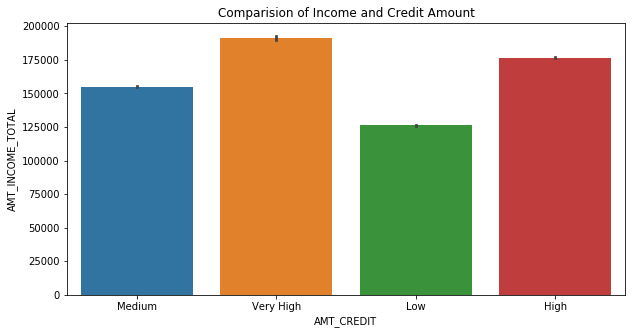

In [39]:
# Lets plot Income of the applicants and Credit Amount
plt.figure(figsize = (10,5))
sns.barplot(x = 'AMT_CREDIT',y = 'AMT_INCOME_TOTAL', data = df)
plt.title('Comparision of Income and Credit Amount')
plt.show()

### Observations
- Higher the income higher the loan amount
- Lower the income lower the loan amount
- This cleary suggests that the current Income of the Applicants, plays a vital role in the loan eligibility 

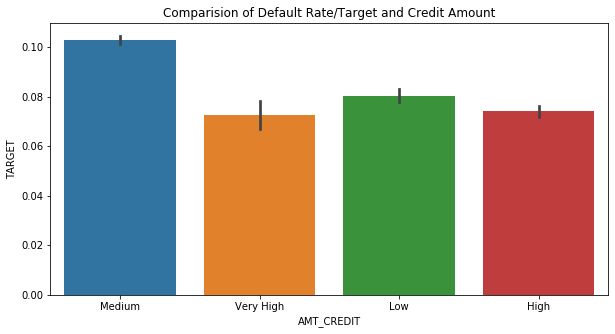

In [40]:
# Lets plot Target and Credit Amount
plt.figure(figsize = (10,5))
sns.barplot(x = 'AMT_CREDIT',y = 'TARGET', data = df)
plt.title('Comparision of Default Rate/Target and Credit Amount')
plt.show()

There is not much to choose here, but applicants with Average/Medium Loan Amount are the ones, who have most difficulties in repayment

## Data Analysis

### Check the imbalance percentage of the TARGET variable.

In [41]:
#Calculate the imbalance percentage
print("The imbalance percentage of the TARGET variable is {}".format(round(100*(df['TARGET'].value_counts()[1]/df['TARGET'].value_counts()[0]),2)))

The imbalance percentage of the TARGET variable is 9.98


### Devide the Data into two sets, Target = 1 and Target = 0

In [42]:
#First check how many rows are there in each segment
df['TARGET'].value_counts()


0    204396
1     20401
Name: TARGET, dtype: int64

In [43]:
# Create a new dataframe Target_1_DF,
Target_1_df = df[df['TARGET'] == 1]

# Verify the no of rows in the new DF, should be 20401
Target_1_df.shape[0]

20401

In [44]:
# Create a new dataframe Target_0_DF,
Target_0_df = df[df['TARGET'] == 0]

# Verify the no of rows in the new DF, should be 204396
Target_0_df.shape[0]

204396

In [45]:
(Target_0_df['TARGET'] != 1).sum()

204396

### Univariate analysis for categorical variables for Target = 1 and Target = 0

We have already binned the Column AMT_CREDIT, this column can be used for further analysis.
Let's have a look

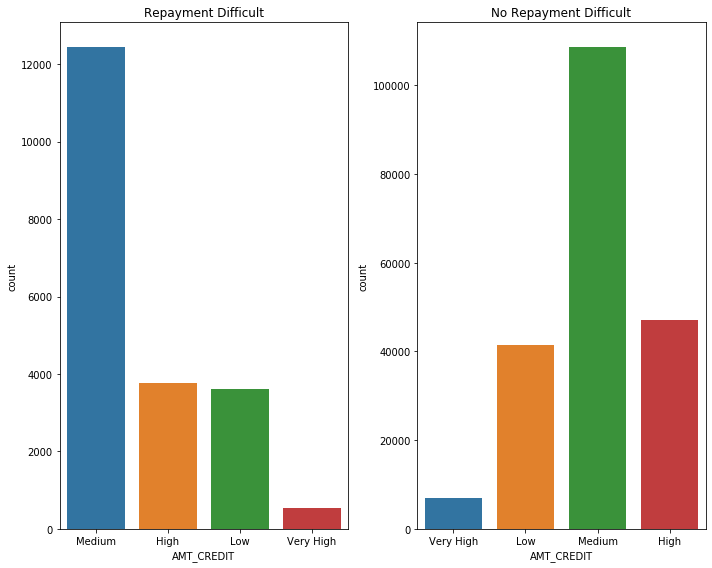

In [46]:
fig = plt.figure(figsize=(10,8))
fig.add_subplot(1, 2, 1)
#plt.subplot(1, 2)
sns.countplot(x = 'AMT_CREDIT', data = Target_1_df)
plt.title('Repayment Difficult')

fig.add_subplot(1, 2, 2)
#plt.subplot(1, 2)
sns.countplot(x = 'AMT_CREDIT', data = Target_0_df)
plt.title('Target = 0')
plt.tight_layout()
plt.title('No Repayment Difficult')
plt.show()

In [47]:
# Create a function plt_univariate to plot graph for variables for univariate analysis
def plt_univariate(ldf, lvar, ltype):
    plt.figure(figsize = (10,5))
    sns.countplot(x = lvar, data = ldf)
    l_title = 'Univariate Analysis of ' + lvar + ' for Taget = ' + ltype 
    plt.title(l_title, fontsize = 15)
    plt.show()
    

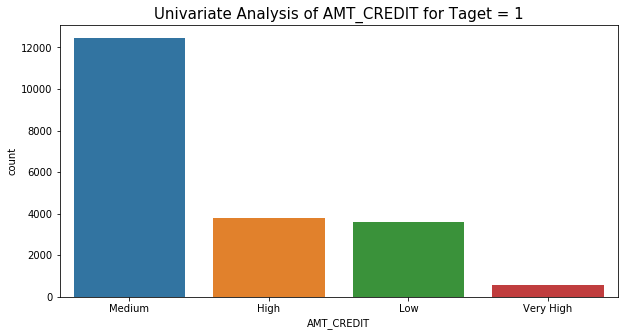

In [48]:
# Plot for AMT_CREDIT for Target = 1
plt_univariate(Target_1_df, 'AMT_CREDIT', '1')

- People with very high Credit amount(above 1250000) are having least difficulty in making repayment.
- People with medium credit amount(Between 250000 and 750000) are the ones, who are the most defaulters

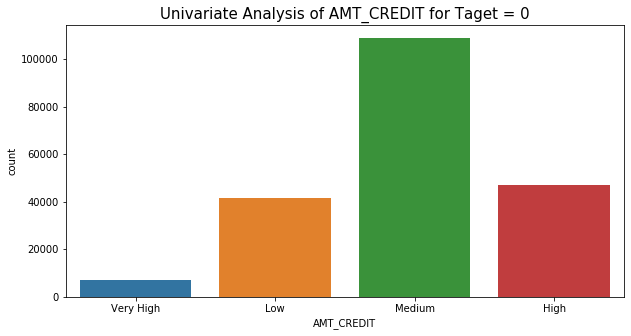

In [49]:
# Plot for AMT_CREDIT for Target = 0
plt_univariate(Target_0_df, 'AMT_CREDIT', '0')

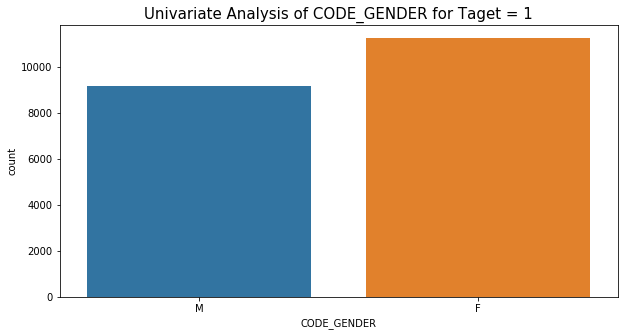

In [50]:
# Plot for CODE_GENDER for Target = 1
plt_univariate(Target_1_df, 'CODE_GENDER', '1')

- Women have more difficulty in repaying the loan amount as compare to Men

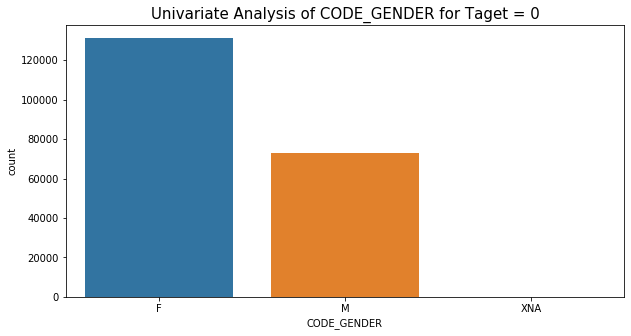

In [51]:
# Plot for CODE_GENDER for Target = 0
plt_univariate(Target_0_df, 'CODE_GENDER', '0')

- No of women applied for loan are higher than men
- This also suggests that females are good in taking care of the loan repayment.

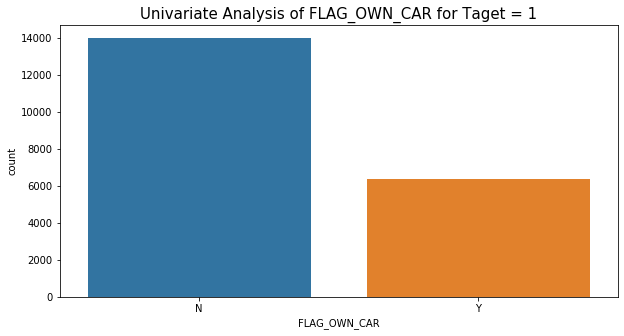

In [52]:
# Plot for FLAG_OWN_CAR for Target = 1
plt_univariate(Target_1_df, 'FLAG_OWN_CAR', '1')

- People who do not have own a car have difficulties in making payment, while the ones, who own car/s are having less 
  difficulty in repayment

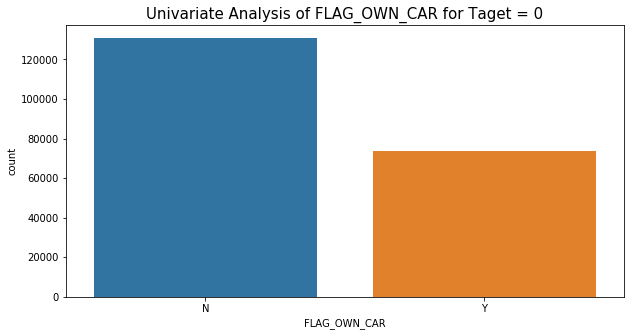

In [53]:
# Plot for FLAG_OWN_CAR for Target = 0
plt_univariate(Target_0_df, 'FLAG_OWN_CAR', '0')

- There are ~130000 people who do not have car and applied for a loan. And they do not difficulties in making repayment.
- There are ~740000 people who have car and are in need of money

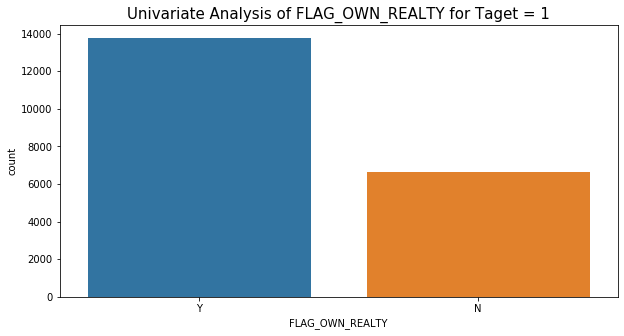

In [54]:
# Plot for FLAG_OWN_REALTY for Target = 1
plt_univariate(Target_1_df, 'FLAG_OWN_REALTY', '1')

- People who do not own Realty have less difficulty in making repayment, while the ones who own house or any other
  realties, have difficuties in repayment.

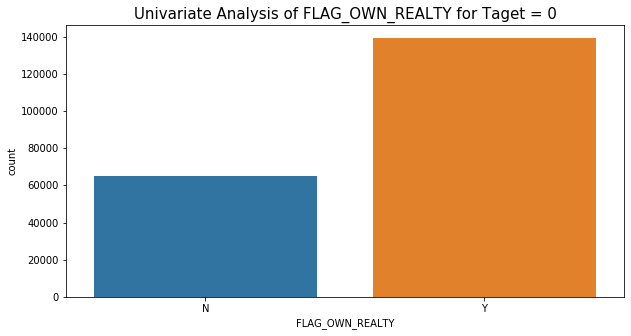

In [55]:
# Plot for FLAG_OWN_REALTY for Target = 0
plt_univariate(Target_0_df, 'FLAG_OWN_REALTY', '0')

- There are approximately 140000 appplicants, who own a realty and applied for a loan. They are good in making repayment as well, as they do not face difficulty in paying EMIs.
- The poeople who do not own a realty are almost half of the ones, who own.

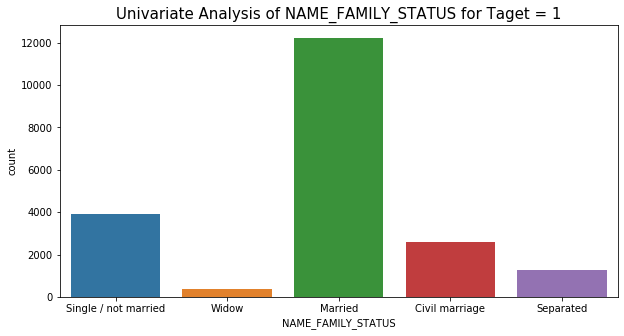

In [56]:
# Plot for NAME_FAMILY_STATUS for Target = 1
plt_univariate(Target_1_df, 'NAME_FAMILY_STATUS', '1')

- People who are married, have difficulties in maing payment, while widows have least difficulties, among the defaulters

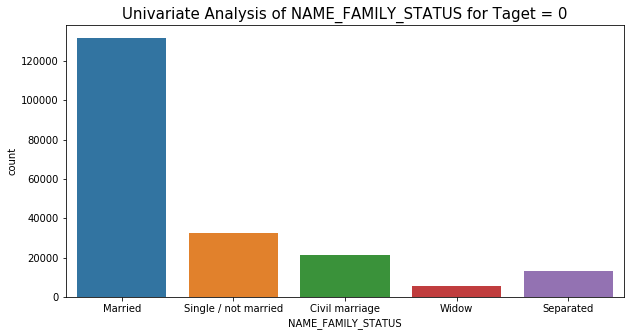

In [57]:
# Plot for NAME_FAMILY_STATUS for Target = 0
plt_univariate(Target_0_df, 'NAME_FAMILY_STATUS', '0')

- The graph suggests that the people who are married, are the ones who need loans.

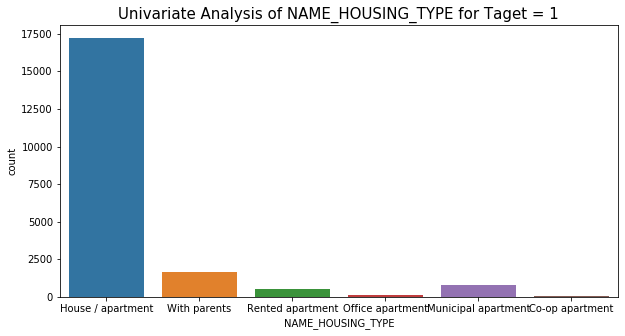

In [58]:
# Plot for NAME_HOUSING_TYPE for Target = 1
plt_univariate(Target_1_df, 'NAME_HOUSING_TYPE', '1')

Applcants who live in an apartment or house are having more difficulties than others

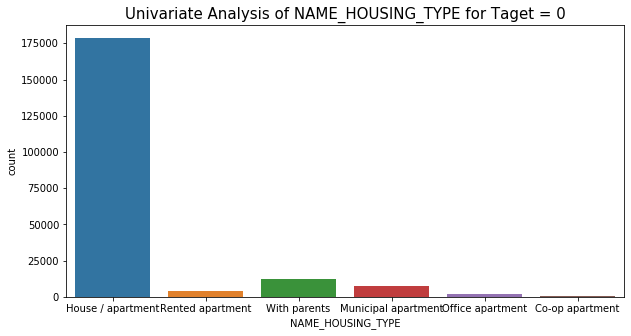

In [59]:
# Plot for NAME_HOUSING_TYPE for Target = 0
plt_univariate(Target_0_df, 'NAME_HOUSING_TYPE', '0')

People who live in co-op apartment are the least in numbers, who need a loan

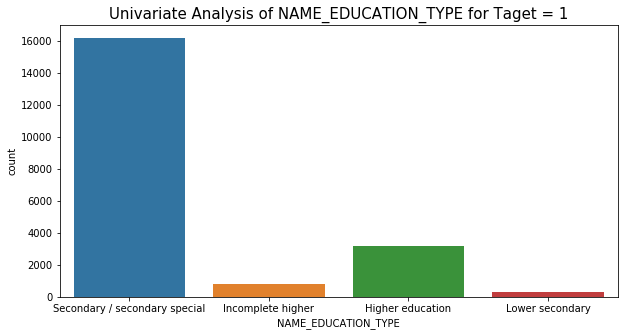

In [60]:
# Plot for NAME_EDUCATION_TYPE for Target = 1
plt_univariate(Target_1_df, 'NAME_EDUCATION_TYPE', '1')

- People who are Secondary educated, have more diffficulties in making repayments than the rest.
- People who are educated till Lower Secondary are the least defaulters.

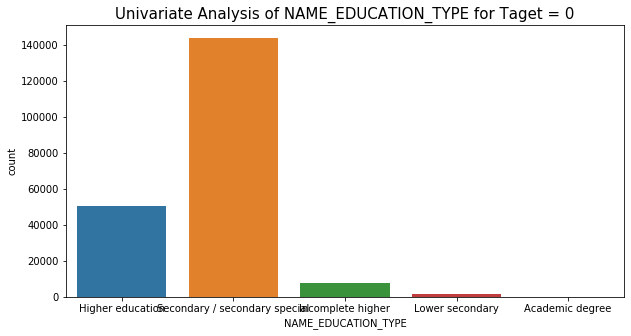

In [61]:
# Plot for NAME_EDUCATION_TYPE for Target = 0
plt_univariate(Target_0_df, 'NAME_EDUCATION_TYPE', '0')

- People who have an Academic degree are the least who need a loan.
- It seems, people who have higher education or the ones, who have secondary/secondary are higher in numbers for a
  a loan application.

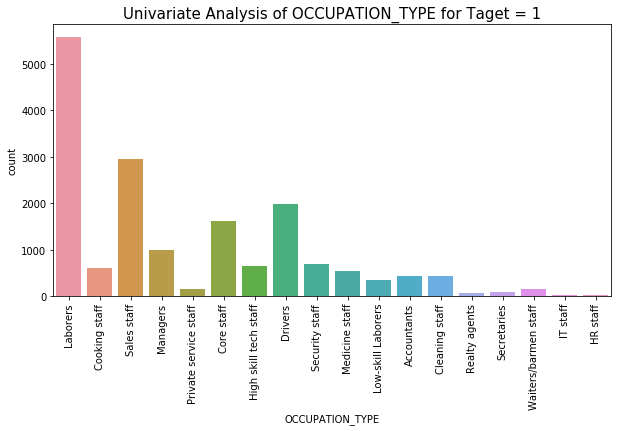

In [62]:
# Plot for OCCUPATION_TYPE for Target = 1
plt.figure(figsize = (10,5))
sns.countplot(x = 'OCCUPATION_TYPE', data = Target_1_df)
l_title = 'Univariate Analysis of OCCUPATION_TYPE for Taget = 1'
plt.xticks(rotation=90)
plt.title(l_title, fontsize = 15)
plt.show()

- Applicants who are laborers, have more difficulties in making payment, while the IT and HR staffes are the ones,
  who least difficuties.
- Interestingly, Highly skilled people are also among the defauters

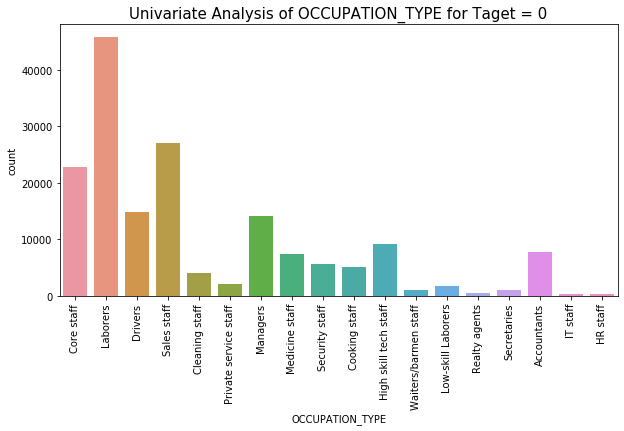

In [63]:
# Plot for OCCUPATION_TYPE for Target = 0
plt.figure(figsize = (10,5))
sns.countplot(x = 'OCCUPATION_TYPE', data = Target_0_df)
l_title = 'Univariate Analysis of OCCUPATION_TYPE for Taget = 0'
plt.xticks(rotation=90)
plt.title(l_title, fontsize = 15)
plt.show()

- Laborers are very high in nunbers, whie IT, HR, Realty employee are very less, when it comes to taking a loan

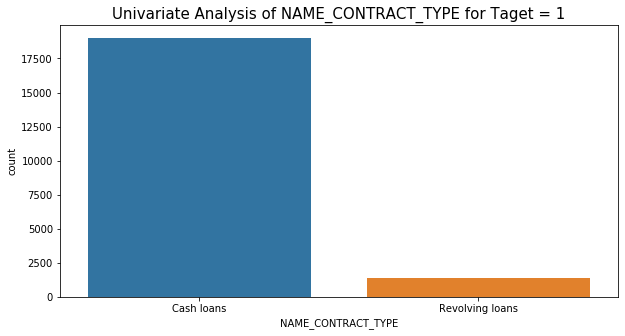

In [64]:
# Plot for NAME_CONTRACT_TYPE for Target = 1
plt_univariate(Target_1_df, 'NAME_CONTRACT_TYPE', '1')

- Cash loans have greater payment defaulter rate than any other types of loan

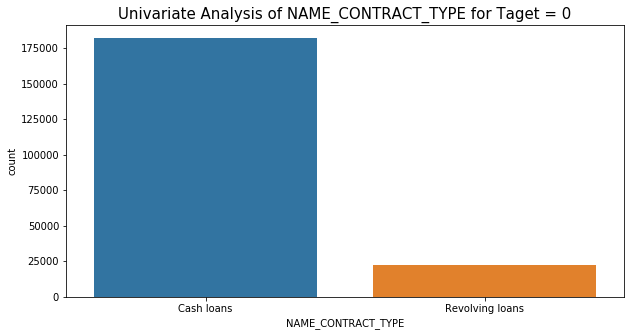

In [65]:
# Plot for NAME_CONTRACT_TYPE for Target = 0
plt_univariate(Target_0_df, 'NAME_CONTRACT_TYPE', '0')

- People are more in need of cash loans than any other types of loan.
- Cash loan applications are 8 times higher than Revolving loans.


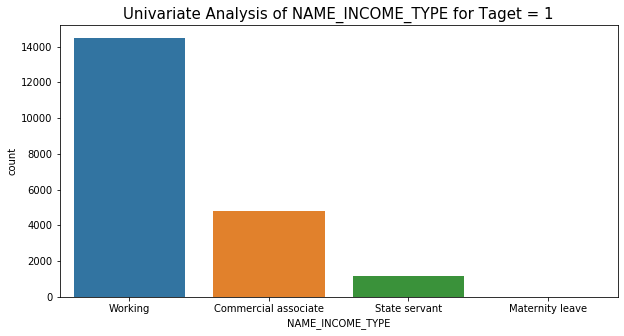

In [66]:
# Plot for NAME_INCOME_TYPE for Target = 1
plt_univariate(Target_1_df, 'NAME_INCOME_TYPE', '1')

- Working clients are ones, who are on the top of the defaulter list.

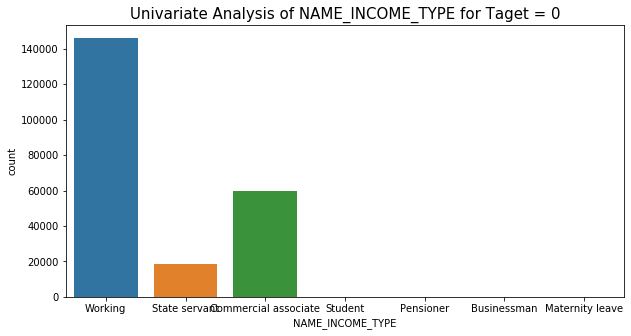

In [67]:
#Plot for NAME_INCOME_TYPE for Target = 0
plt_univariate(df, 'NAME_INCOME_TYPE', '0')

- Working People are the ones, who apply most for the loans

### Find the correlations for numeric columns for both the Targets

In [68]:
# Get all the numeric datatype in a list
l_num_list = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'AGE', 'JOB_EXPERIENCE']

In [69]:
# Find the correations for Numerice Columns for Target = 1
Target_1_Corr = Target_1_df.loc[:, l_num_list].corr()
Target_C1 = Target_1_Corr.unstack()

# Print the correlations in the descending order
print(Target_C1.sort_values(ascending = False))

JOB_EXPERIENCE    JOB_EXPERIENCE      1.0000
AGE               AGE                 1.0000
AMT_INCOME_TOTAL  AMT_INCOME_TOTAL    1.0000
AMT_ANNUITY       AMT_ANNUITY         1.0000
CNT_FAM_MEMBERS   CNT_FAM_MEMBERS     1.0000
AMT_GOODS_PRICE   AMT_GOODS_PRICE     1.0000
CNT_CHILDREN      CNT_CHILDREN        1.0000
                  CNT_FAM_MEMBERS     0.8935
CNT_FAM_MEMBERS   CNT_CHILDREN        0.8935
AMT_ANNUITY       AMT_GOODS_PRICE     0.7342
AMT_GOODS_PRICE   AMT_ANNUITY         0.7342
AMT_ANNUITY       AMT_INCOME_TOTAL    0.3793
AMT_INCOME_TOTAL  AMT_ANNUITY         0.3793
                  AMT_GOODS_PRICE     0.3077
AMT_GOODS_PRICE   AMT_INCOME_TOTAL    0.3077
AGE               JOB_EXPERIENCE      0.3053
JOB_EXPERIENCE    AGE                 0.3053
AGE               AMT_GOODS_PRICE     0.1831
AMT_GOODS_PRICE   AGE                 0.1831
                  JOB_EXPERIENCE      0.1191
JOB_EXPERIENCE    AMT_GOODS_PRICE     0.1191
AMT_INCOME_TOTAL  AGE                 0.0866
AGE       

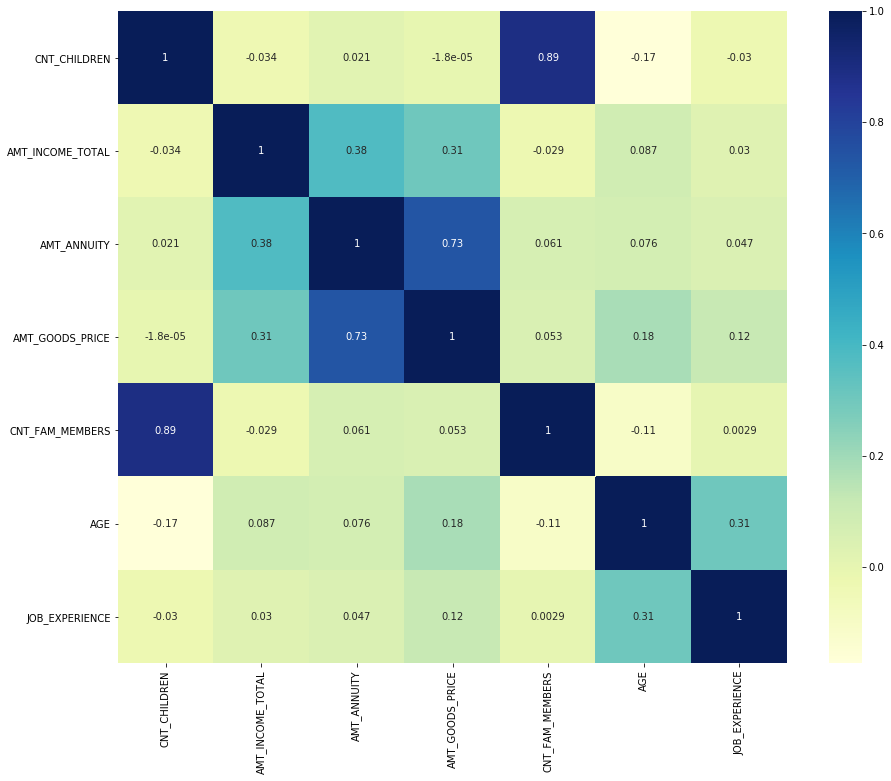

In [70]:
# Plot the graph for visual analysis
plt.figure(figsize=(15,12))
sns.heatmap(Target_1_Corr, annot = True, cmap="YlGnBu")
plt.show()

### Insight

As per the analysis:
- There is a high correlation between CNT_CHILDREN and CNT_FAM_MEMBERS
- There is good correation between AMT_ANNUITY and AMT_GOODS_PRICE. Higher the price of the goods, higher the loan given to the customers.
- There is negative between AMT_INCOME_TOTAL and CNT_FAM_MEMBERS. As the no of members in the family increases, the
  total income of the Customer decreases.

In [71]:
# Find the correations for Numeric Columns for Target = 0
Target_0_Corr = Target_0_df.loc[:, l_num_list].corr()
Target_C0 = Target_0_Corr.unstack()

# Print the correlations in the descending order
print(Target_C0.sort_values(ascending = False))

JOB_EXPERIENCE    JOB_EXPERIENCE      1.0000
AGE               AGE                 1.0000
AMT_INCOME_TOTAL  AMT_INCOME_TOTAL    1.0000
AMT_ANNUITY       AMT_ANNUITY         1.0000
CNT_FAM_MEMBERS   CNT_FAM_MEMBERS     1.0000
AMT_GOODS_PRICE   AMT_GOODS_PRICE     1.0000
CNT_CHILDREN      CNT_CHILDREN        1.0000
CNT_FAM_MEMBERS   CNT_CHILDREN        0.8923
CNT_CHILDREN      CNT_FAM_MEMBERS     0.8923
AMT_ANNUITY       AMT_GOODS_PRICE     0.7483
AMT_GOODS_PRICE   AMT_ANNUITY         0.7483
AMT_ANNUITY       AMT_INCOME_TOTAL    0.3901
AMT_INCOME_TOTAL  AMT_ANNUITY         0.3901
AGE               JOB_EXPERIENCE      0.3415
JOB_EXPERIENCE    AGE                 0.3415
AMT_GOODS_PRICE   AMT_INCOME_TOTAL    0.3156
AMT_INCOME_TOTAL  AMT_GOODS_PRICE     0.3156
AGE               AMT_GOODS_PRICE     0.1491
AMT_GOODS_PRICE   AGE                 0.1491
JOB_EXPERIENCE    AMT_GOODS_PRICE     0.0852
AMT_GOODS_PRICE   JOB_EXPERIENCE      0.0852
AMT_ANNUITY       AGE                 0.0791
AGE       

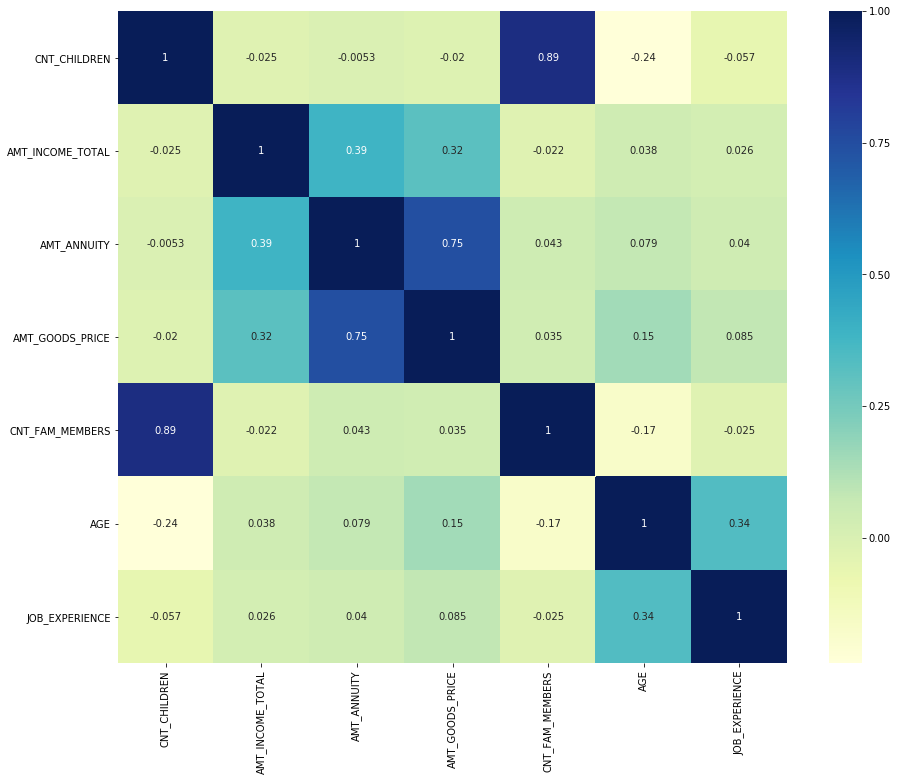

In [72]:
# Plot the graph for visual analysis
plt.figure(figsize=(15,12))
sns.heatmap(Target_0_Corr, annot = True, cmap="YlGnBu")
plt.show()

### Insight

As per the analysis:
- There is a high correlation between CNT_CHILDREN and CNT_FAM_MEMBERS
- There is good correation between AMT_ANNUITY and AMT_GOODS_PRICE. Higher the price of the goods, higher the loan given to the customers.
- There is negative between AMT_INCOME_TOTAL and CNT_FAM_MEMBERS. As the no of members in the family increases, the
  total income of the Customer decreases.

### Check, if the variables with highest correralation are the same

- Yes, the variables with highest correlations are the same i.e. CNT_FAM_MEMBERS and CNT_CHILDREN



### Univariate analysis for categorical variables for Target = 1 and Target = 0


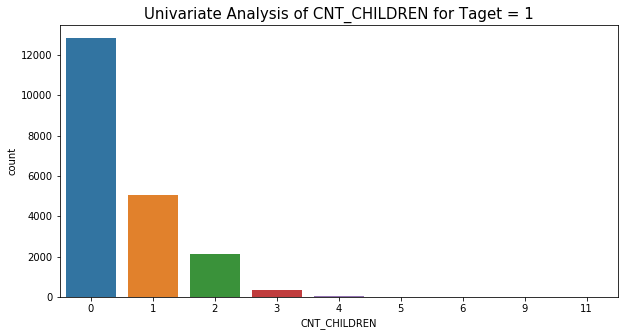

In [73]:
# Plot for CNT_CHILDREN for Target = 1
plt_univariate(Target_1_df, 'CNT_CHILDREN', '1')

- Clients with no children are riskier than clients, having childrens. 

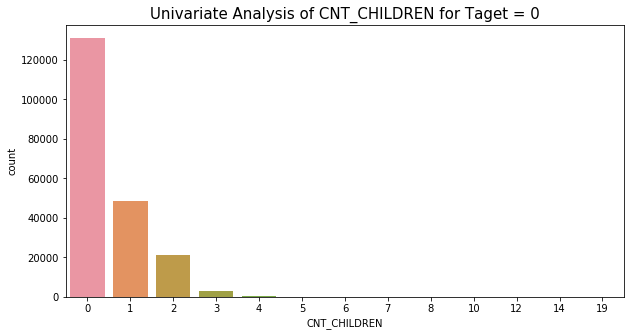

In [74]:
# Plot for CNT_CHILDREN for Target = 0
plt_univariate(Target_0_df, 'CNT_CHILDREN', '0')

- There are approximately ~131000 customers with no childrens.
- There is only one client with the highest no of childrens(12)
- Most of the clients are either having 1 or 2 childrens

In [75]:
Target_1_df.AMT_ANNUITY.value_counts()

9000.0000     494
13500.0000    285
26640.0000    237
31261.5000    191
25537.5000    151
22018.5000    146
6750.0000     136
29970.0000    130
26217.0000    123
21888.0000    110
10125.0000    106
26509.5000    104
37800.0000     98
36459.0000     97
31653.0000     95
20250.0000     89
22599.0000     88
40320.0000     85
28408.5000     83
30528.0000     79
31630.5000     74
35937.0000     72
35392.5000     67
32274.0000     63
11250.0000     61
35685.0000     61
25407.0000     59
12375.0000     59
31153.5000     57
21109.5000     56
24543.0000     54
17775.0000     52
27324.0000     52
16155.0000     51
32602.5000     50
21906.0000     50
16852.5000     50
17905.5000     48
26446.5000     48
38331.0000     48
16875.0000     47
31464.0000     47
17167.5000     46
35554.5000     45
21775.5000     45
21375.0000     45
16573.5000     44
19134.0000     44
27423.0000     42
33376.5000     41
24412.5000     40
30573.0000     40
26086.5000     39
33025.5000     39
29839.5000     38
22500.0000

In [76]:
# Create a function to plot Numeric Variables for Univariate Anaysis
def plt_num_univariate(ldf, lvar, ltype):
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(15,5))
    ax[0].set_title("Distribution Plot for " + lvar + " for Target = " + ltype)
    sns.distplot(ldf[lvar],ax=ax[0])
    ax[1].set_title("Violin Plot for " + lvar + " for Target = " + ltype)
    sns.violinplot(data = ldf, x= lvar, ax = ax[1], inner = "quartile")
    plt.show()

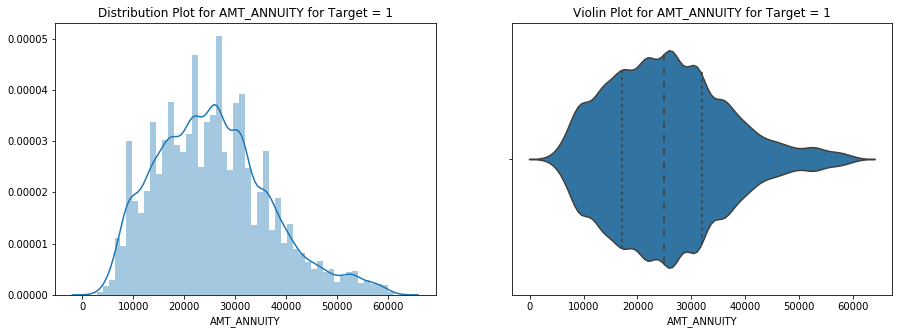

In [77]:
# Since, the values for AMT_ANNUITY are sparsely distibuted, therefore, plot distribtution graph
plt_num_univariate(Target_1_df, 'AMT_ANNUITY', '1' )

- Most of the Amount Annuity is between ~25000 and ~31000. This the range, where most no of defaulters are found.
- Minimum annuity is closed to 3000, while the maximum is around 60000

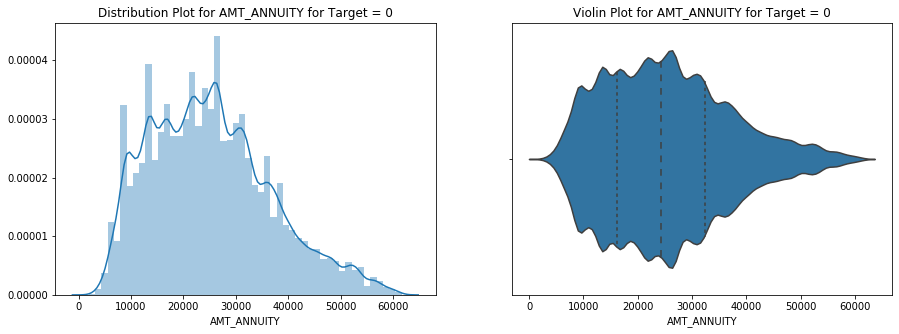

In [78]:
# Since, the values for AMT_ANNUITY are sparsely distibuted, therefore, plot distribtution graph
plt_num_univariate(Target_0_df, 'AMT_ANNUITY', '0' )

- Most of the Amount Annuity is between ~24000 and ~33000.
- Minimum annuity is closed to 2000, while the maximum is around 61000

In [79]:
Target_1_df['AMT_GOODS_PRICE'].describe()

count     20401.0000
mean     453357.2662
std      257801.4884
min       45000.0000
25%      234000.0000
50%      450000.0000
75%      630000.0000
max     1327500.0000
Name: AMT_GOODS_PRICE, dtype: float64

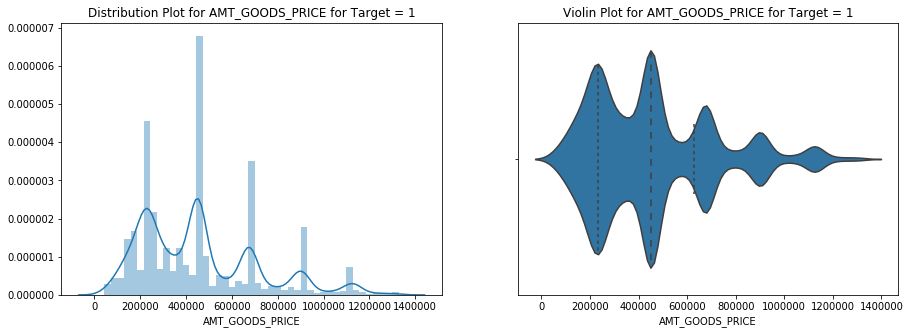

In [80]:
plt_num_univariate(Target_1_df, 'AMT_GOODS_PRICE', '1')

- Most of the Goods Prices are between ~450000 and ~630000.
- Minimum Goods Price is closed to 45000, while the maximum is around 13200000

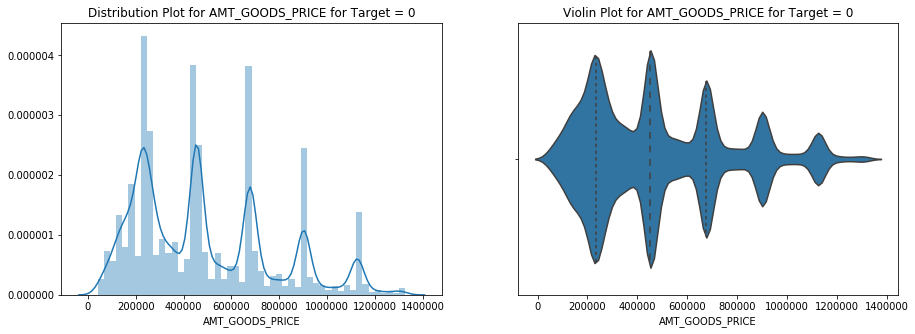

In [81]:
# Plot for AMT_GOODS_PRICE for Target = 0
plt_num_univariate(Target_0_df, 'AMT_GOODS_PRICE', '0')

In [82]:
Target_0_df['AMT_GOODS_PRICE'].describe()

count    204396.0000
mean     483944.2280
std      288269.1951
min       40500.0000
25%      234000.0000
50%      450000.0000
75%      675000.0000
max     1327500.0000
Name: AMT_GOODS_PRICE, dtype: float64

- Most of the Goods Prices are between ~450000 and ~670000.
- Minimum Goods Price is closed to 40000, while the maximum is around 13200000

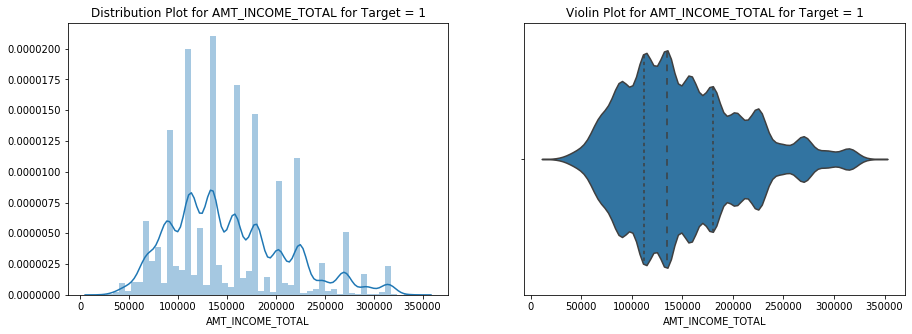

In [83]:
# Plot for AGE for Target = 1
plt_num_univariate(Target_1_df, 'AMT_INCOME_TOTAL', '1')

- Most of the clients are earning between ~135000 and ~180000
- Minimum income of the clients is around 27000, while the maximum is approximately 336000
- Average income is approximately 135000

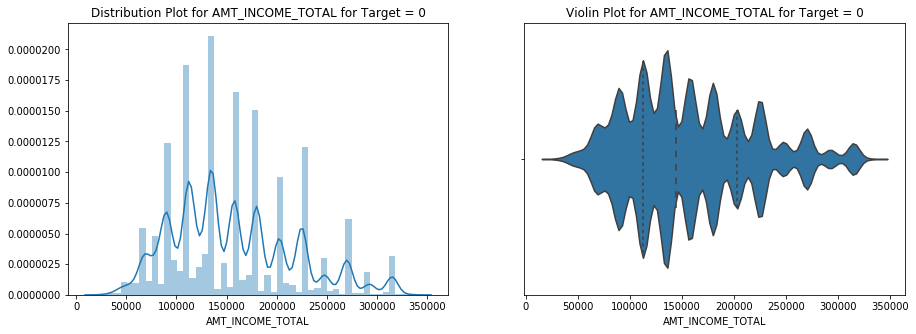

In [84]:
# Plot for AGE for Target = 0
plt_num_univariate(Target_0_df, 'AMT_INCOME_TOTAL', '0')

- Most of the clients are earning between ~144000 and ~200000
- Minimum income of the clients is around 25000, while the maximum is approximately 337000
- Average income is approximately 144000

In [85]:
Target_0_df['AMT_INCOME_TOTAL'].describe()

count   204396.0000
mean    155803.8889
std      60841.3848
min      25650.0000
25%     112500.0000
50%     144000.0000
75%     202500.0000
max     337050.0000
Name: AMT_INCOME_TOTAL, dtype: float64

### Perform Bivariate Analysis For Numerical Variables

In [86]:
# Create a new function called plt_bivariate, which will perform the bivaraiate analysis for the given input variables
# Please note - we have not removed outliers from most of the variables as part of this exercise, hence, unsing MEDIAN
def plt_bivariate(ldf, lvar1, lvar2, ltype, lhue):
    from numpy import median
    plt.figure(figsize = (10,5))
    l_title = "Comparision of " + lvar1 + " & " + lvar2 + " for Target = " + ltype
    if not lhue:
        sns.barplot(x = lvar1, y = lvar2, data = ldf, estimator = median)
    else:
        sns.barplot(x = lvar1, y = lvar2, hue = lhue, data = ldf, estimator = median)
    plt.title(l_title, fontsize = 15)
    plt.show()
    

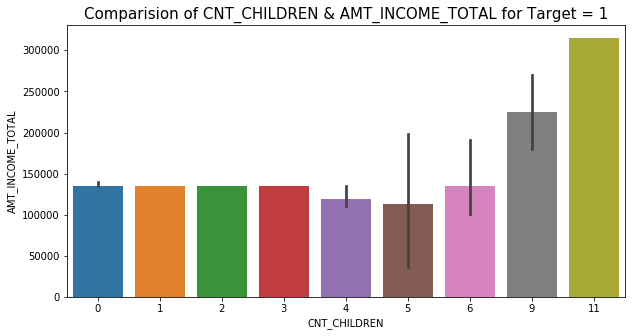

In [87]:
# Analyis for AMT_INCOME and CNT_CHILDRENS for Target = 1
plt_bivariate(Target_1_df, 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', '1', '')

- The average Income of the childless applicants is ~135000
- The applicants with 5 childrens, have the lowest average income(112500)
- The applicants with 11 childrens, have the highest average income(315000)

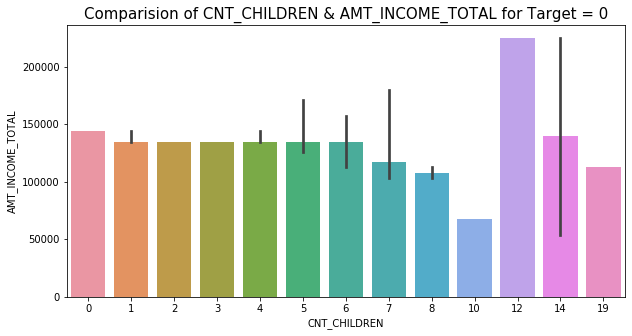

In [88]:
# Analyis for AMT_INCOME and CNT_CHILDRENS for Target = 1
plt_bivariate(Target_0_df, 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', '0', '')

- The average Income of the childless applicants is ~144000
- The applicants with 10 childrens, have the lowest average income(~67500)
- The applicants with 12 childrens, have the highest average income(~225000)
- There are applicants with 19 childrens, this seems unrealistic in today's world. Must be a data entry issue.


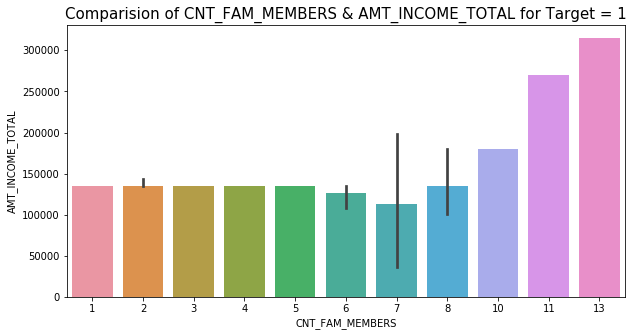

In [89]:
# Analyis for AMT_INCOME and CNT_FAM_MEMBERS for Target = 1
plt_bivariate(Target_1_df, 'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL', '1', '')

- The average Income of the applicants, having upto 5 family members is ~135000
- The applicants with 7 family members, have the lowest average income(~112500)
- The applicants with 13 family members, have the highest average income(~315000)


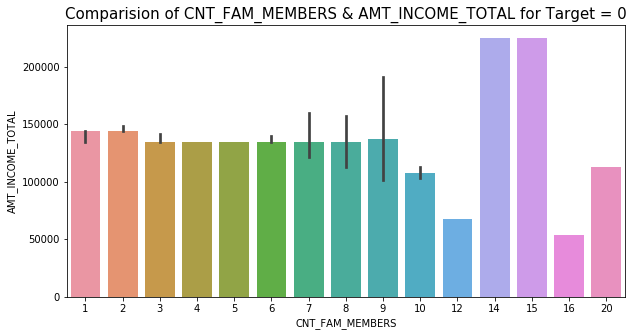

In [90]:
# Analyis for AMT_INCOME and CNT_FAM_MEMBERS for Target = 0
plt_bivariate(Target_0_df, 'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL', '0', '')

- The average Income of the applicants, having family members between 3 and 8 is ~135000
- The applicants with 16 family members, have the lowest average income(~54000)
- The applicants with 14 or 15 family members, have the highest average income(~225000)


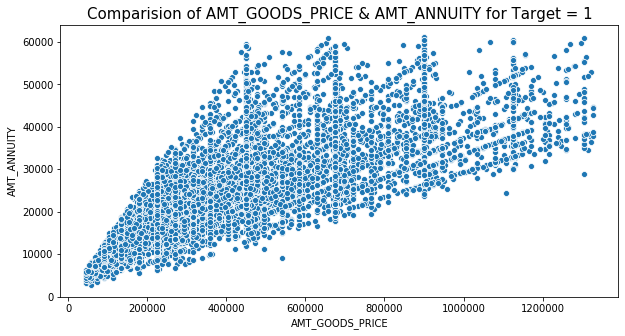

In [91]:
# Scatter Plot for AMT_GOODS_PRICE and AMT_ANNUITY
plt.figure(figsize = (10,5))
sns.scatterplot(Target_1_df['AMT_GOODS_PRICE'], Target_1_df['AMT_ANNUITY'])
plt.title('Comparision of AMT_GOODS_PRICE & AMT_ANNUITY for Target = 1', fontsize = 15)
plt.show()

- There is a high correlation between Annuity Amount and the price of the goods of the clients.
- Higher the value of the Goods, higher is the Annuity amount.

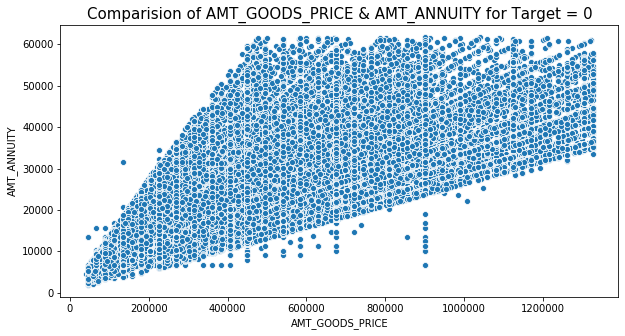

In [92]:
# Scatter Plot for AMT_GOODS_PRICE and AMT_ANNUITY
plt.figure(figsize = (10,5))
sns.scatterplot(Target_0_df['AMT_GOODS_PRICE'], Target_0_df['AMT_ANNUITY'])
plt.title('Comparision of AMT_GOODS_PRICE & AMT_ANNUITY for Target = 0', fontsize = 15)
plt.show()

- There is a high correlation between Annuity Amount and the price of the goods of the clients.
- Higher the value of the Goods, higher is the Annuity amount.

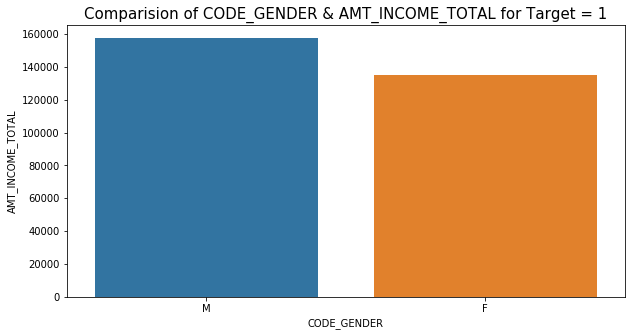

In [93]:
# Analyis for GENDER_CODE and AMT_INCOME_TOTAL for Target = 1
plt_bivariate(Target_1_df, 'CODE_GENDER', 'AMT_INCOME_TOTAL', '1', '')

- The average income of the Male applicants is ~157000, wheras for Female applicants, it is ~135000  

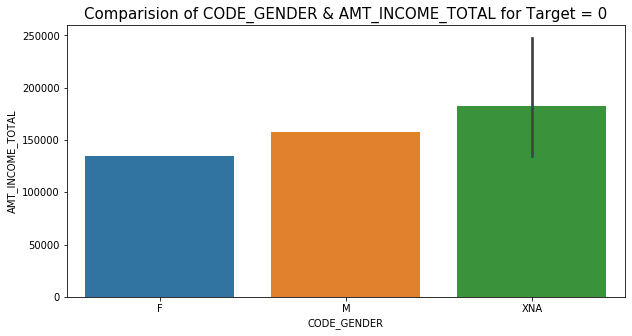

In [94]:
# Analyis for GENDER_CODE and AMT_INCOME_TOTAL for Target = 0
plt_bivariate(Target_0_df, 'CODE_GENDER', 'AMT_INCOME_TOTAL', '0', '')

- The average income of the Male applicants is ~157000, wheras for Female applicants, it is ~135000 
- The unknown gender has the highest average income, which is ~182000

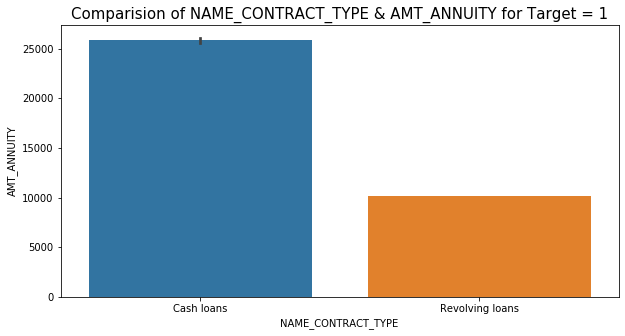

In [95]:
# Analyis for GENDER_CODE and AMT_ANNUITY for Target = 1
plt_bivariate(Target_1_df, 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', '1', '')

- Clients who applied for Cash loans, have average Annuity Amount ~25000
- Clients with Resolving loans, have average Annuity amount ~ 10000

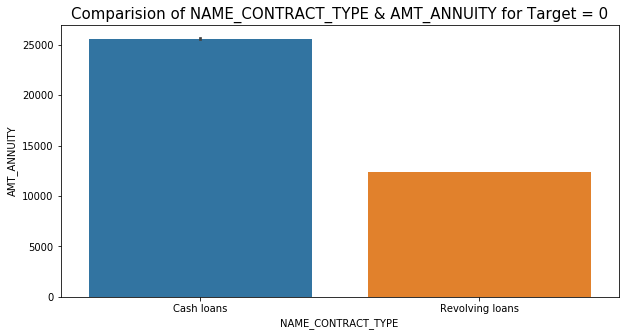

In [96]:
# Analyis for GENDER_CODE and AMT_ANNUITY for Target = 0
plt_bivariate(Target_0_df, 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', '0', '')

- Clients who applied for Cash loans, have average Annuity Amount ~25000
- Clients with Resolving loans, have average Annuity amount ~ 12000

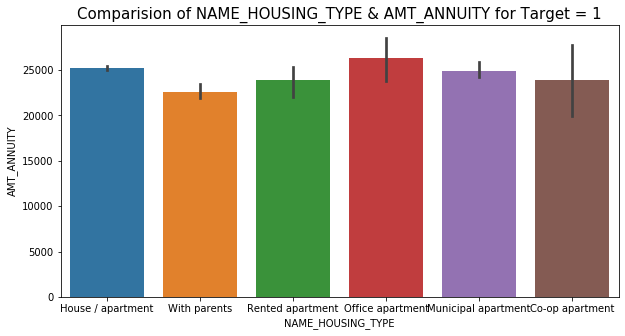

In [97]:
# Analyis for  NAME_HOUSING_TYPE and AMT_ANNUITY for Target = 1
plt_bivariate(Target_1_df, 'NAME_HOUSING_TYPE', 'AMT_ANNUITY', '1', '')

- Clients living with parents, have the lowest average Annuity, and they are having difficulties in repay the loan.
- Clients living in office accomodation, have the highest average Annuity, and they also have difficulties in repayment.

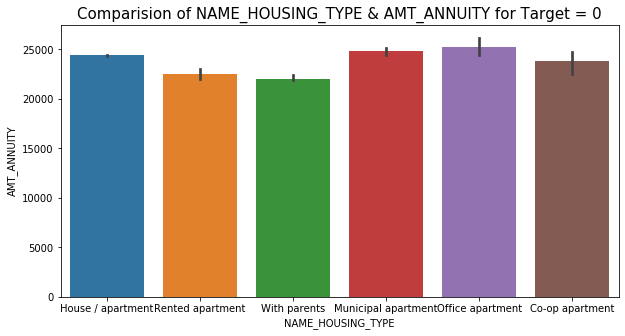

In [98]:
# Analyis for NAME_HOUSING_TYPE and AMT_ANNUITY for Target = 0
plt_bivariate(Target_0_df, 'NAME_HOUSING_TYPE', 'AMT_ANNUITY', '0', '')

- Here also, Clients living with parents, have the lowest average Annuity(~22000).
- Clients living in office accomodation, have the highest average Annuity(~25000)